# Decision Tree with data generated by make_moons

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import scipy

sns.set()

### Generate data with make_moons

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

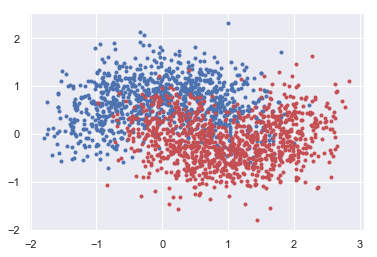

In [4]:
plt.plot(X_test[y_test == 0][:, 0],X_test[y_test == 0][:, 1] , 'b.')

plt.plot(X_test[y_test == 1][:, 0],X_test[y_test == 1][:, 1] , 'r.')


### Find suitable hyperparameters

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = [{'min_samples_leaf':[1, 2, 3, 5, 10], 'max_leaf_nodes':[10, 20, 50, 100, 200]}]

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf, param_grid, cv = 3)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))

print('Parameters for the best estimator: ', grid_search.best_params_)

Best score: 0.852875
Parameters for the best estimator:  {'max_leaf_nodes': 20, 'min_samples_leaf': 5}


## Use the best estimator for training

In [6]:
final_model = grid_search.best_estimator_

final_model.fit(X_train, y_train)

final_model.score(X_test, y_test)

0.8545

## Build a random forest

### Split the training set by using ShuffleSplit

In [7]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits = 1000, train_size = 100, test_size = 50)

In [8]:
from sklearn.base import clone

tree_list = []

for train_index, test_index in rs.split(X_train):
    
    single_tree = clone(grid_search.best_estimator_)
    single_tree.fit(X_train[train_index], y_train[train_index])
#     print(single_tree.score(X_train[test_index], y_train[test_index]))
    tree_list.append(single_tree)

In [9]:
from scipy.stats import mode

y_pred = []


for i in range(X_test.shape[0]):
    
    y_i_pred = []
    
    for single_tree in tree_list:
        y_i_pred.append(single_tree.predict(X_test[i].reshape(1, -1)))
    
    y_pred.append(mode(y_i_pred).mode)

y_pred = np.array(y_pred).reshape(X_test.shape[0])

### Accuracy of random forest

In [10]:
(y_pred == y_test).sum()/len(y_test)

0.858